# Fundamentals of Machine Learning - Exercise 2
* The aim of the exercise is to learn basic techniques for visualization creation and interpretation using Matplotlib and Seaborn libraries.

![meme02](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_02.png?raw=true)

# Exploratory data analysis

Data source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

Important attributes description:
* SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* Heating: Type of heating
* CentralAir: Central air conditioning
* GrLivArea: Above grade (ground) living area square feet
* BedroomAbvGr: Number of bedrooms above basement level

## Import used packages

In [ ]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file
* https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv

In [ ]:
df_full = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/zsu_cv1_data.csv')

## Price is the most interisting attribute in our dataset, let's take a look on its distribution
- SalePrice

## Vizualize house prices in form of histogram
- What does it tell us about the prices?

<Axes: xlabel='SalePrice', ylabel='Count'>

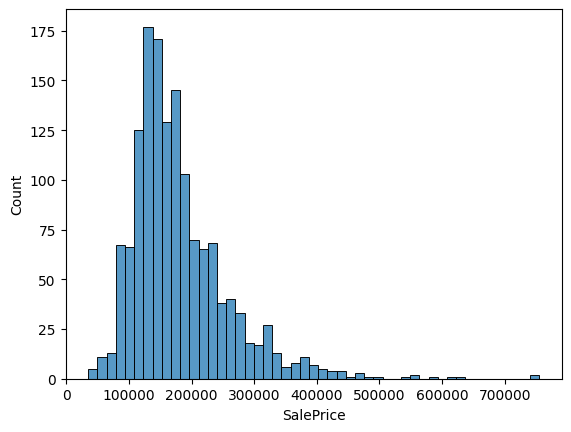

In [ ]:
sns.histplot(df_full.SalePrice)
#sns.displot(dg_full.SalePrice)

### Modify bins
- Perhaps we want to visualize the histogram with more dense or coarse bins
- *bins* attribute

<Axes: xlabel='SalePrice', ylabel='Count'>

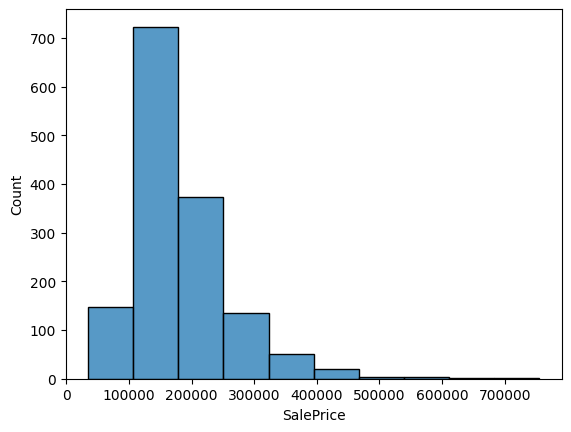

In [ ]:
sns.histplot(df_full.SalePrice, bins=10)

### Use quartiles (Q1, Q3) for highlighting most common price range in histogram

* Check functions *describe* and *quantile* over price column

In [ ]:
df_full.SalePrice.describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [ ]:
df_full.SalePrice.quantile(0.25)

129975.0

In [ ]:
df_full.SalePrice.quantile(0.75)

214000.0

## 🔎 What can we say about prices based on the quantiles?
### Use function *axvline* from Matplotlib to draw vertical lines at the quartile positions

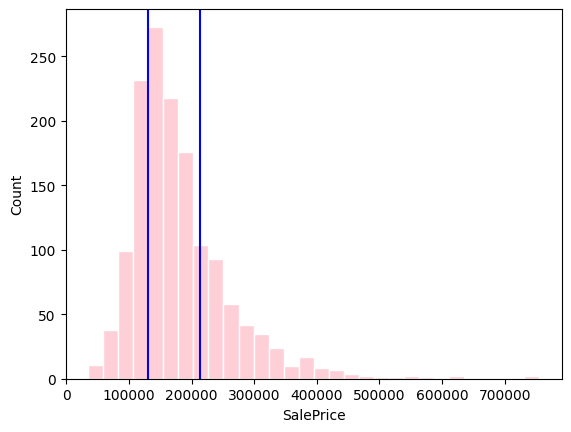

In [ ]:
sns.histplot(df_full.SalePrice, bins=30, edgecolor='white', color='pink')
plt.axvline(df_full.SalePrice.quantile(0.25), color='blue')
plt.axvline(df_full.SalePrice.quantile(0.75), color='blue')

## 📊 Let's add more complexity to histogram vizualizations.
### Does price change for different values of GaragaFinish attribute?

### GarageFinish: Interior finish of the garage
- Fin	Finished
- RFn	Rough Finished
- Unf	Unfinished
- NA	No Garage

In [ ]:
df_full.GarageFinish.unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

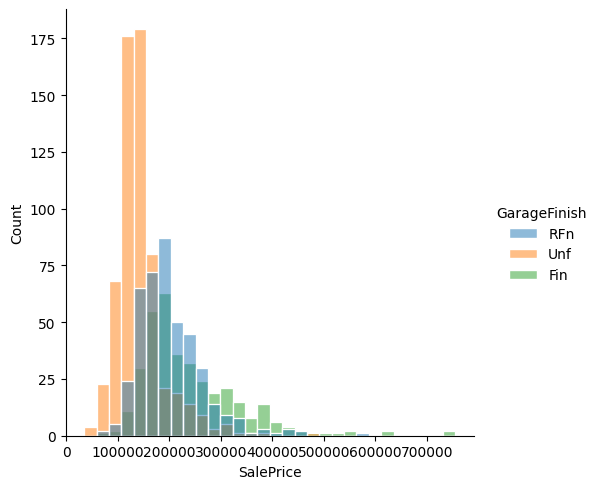

In [ ]:
sns.displot(data=df_full, x='SalePrice', bins=30, edgecolor='white', hue='GarageFinish')

### 💡 We can see that houses with no garage are somehow missing
- The no garage houses have a *nan* value in the feature so they are not plotted

### Fill nan values with 'NoGarage' string

In [ ]:
df_full.GarageFinish = df_full.GarageFinish.fillna('NoGarage')

### Take a look at the histogram again

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

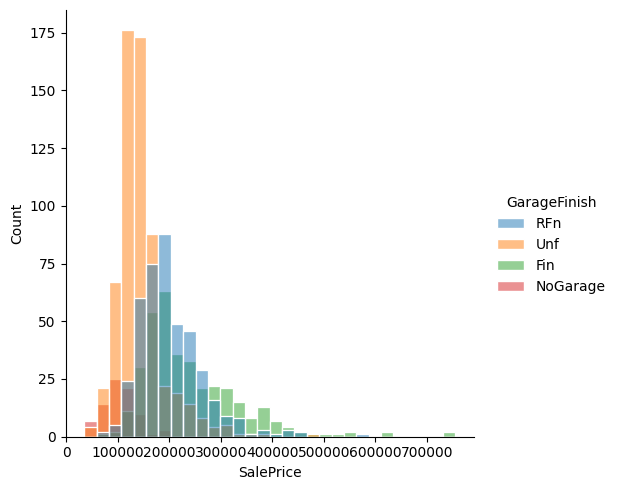

In [ ]:
sns.displot(data=df_full, x='SalePrice', bins=30, edgecolor='white', hue='GarageFinish')

## 💡 Sometimes the histograms distinguished by colors are not easily redeable
- We can use *col* attribute to automatically plot every histogram on its own canvas

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

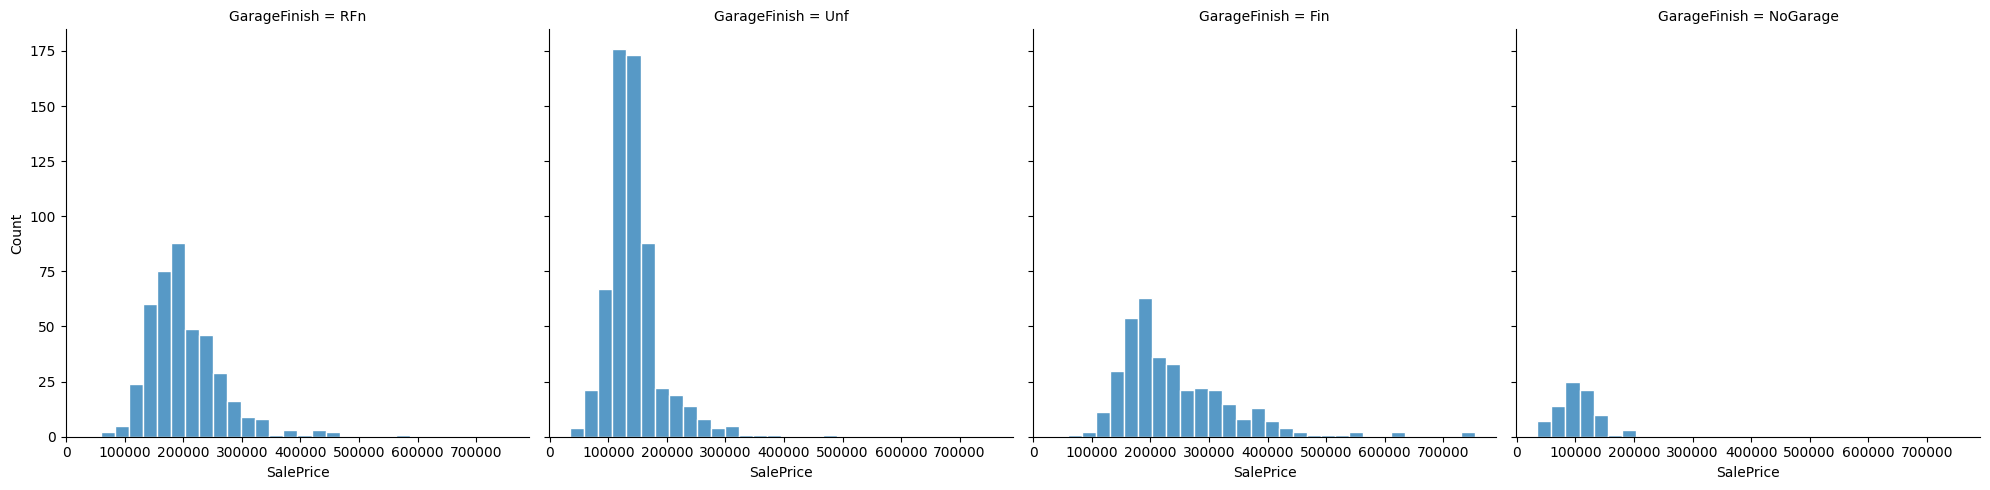

In [ ]:
sns.displot(data=df_full, x='SalePrice', bins=30, edgecolor='white', col='GarageFinish')

# 📊 Another very useful tecnique for the numerical features distributions are boxplots
- 🔎 Did you see any of these before?

- 🔎 How should we read boxplots?
    - **Quartiles**
    - **Median**
    - Box size
    - **Outliers and IQR**
    - Min/max - with or without outliers

### Plot only the *SalePrice* using boxplot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='SalePrice'>

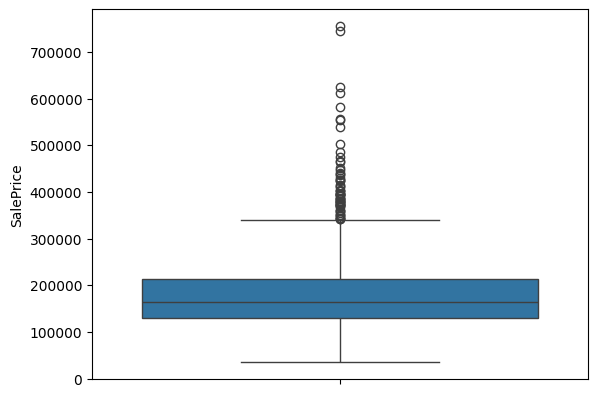

In [ ]:
sns.boxplot(data=df_full, y='SalePrice')

## Let's take a look at the *SalePrice* for different *BldgType* values
- 🔎 What can we say about the prices?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='BldgType', ylabel='SalePrice'>

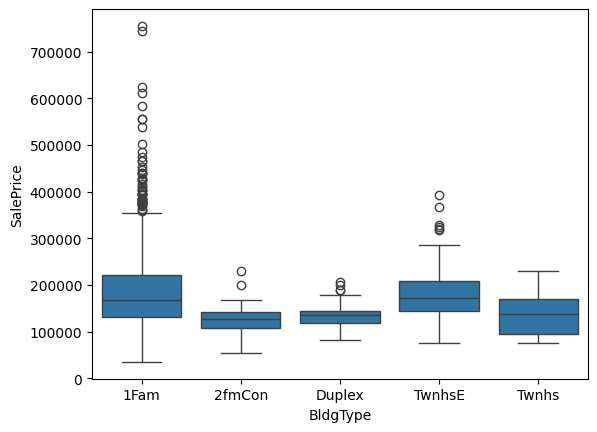

In [ ]:
sns.boxplot(data=df_full, y='SalePrice', x='BldgType')

## We can do the same for *GrLivArea*

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='GrLivArea'>

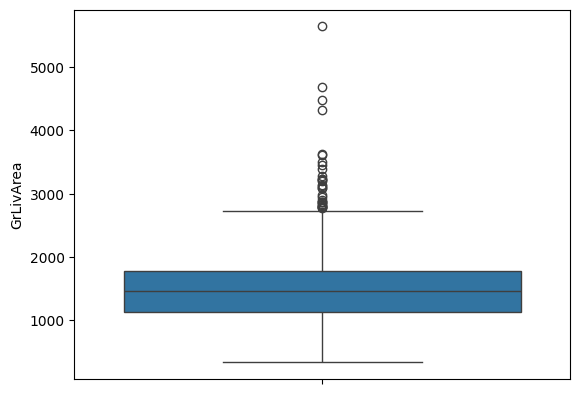

In [ ]:
sns.boxplot(data=df_full, y='GrLivArea')

## Let's take a look at the *GrLivArea* for different *BldgType* values
- 🔎 What can we say about the GrLivArea?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='BldgType', ylabel='GrLivArea'>

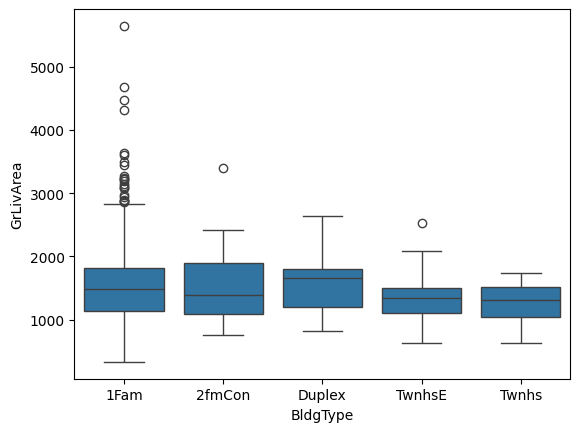

In [ ]:
sns.boxplot(data=df_full, y='GrLivArea', x='BldgType')

# 📊 Scatter plots are commonly used for visualizing two numerical variables

### We can use standard *scatterplot* with *BldgType* as a *hue* so we can better grasp the relationship between *GrLivArea* and *SalePrice*
* Try to set *alpha* parameter for opacity settings

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

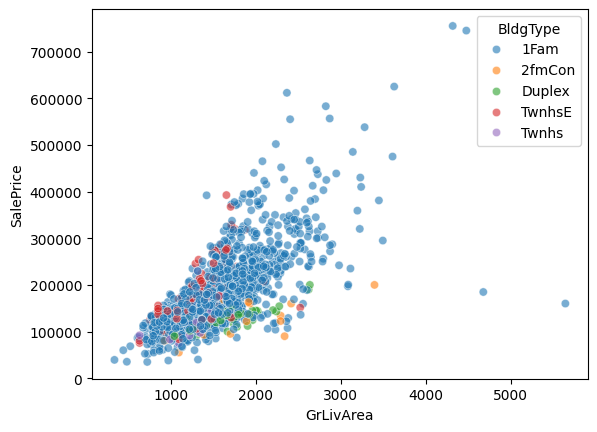

In [ ]:
sns.scatterplot(data=df_full, x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.6)

### We can see there are some outliers in the data, let's zoom only to area without them, how can we filter the data?

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

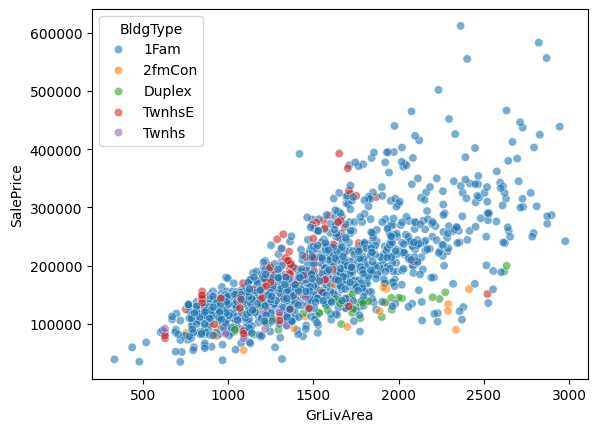

In [ ]:
sns.scatterplot(data=df_full[df_full.GrLivArea < 3000], x='GrLivArea', y='SalePrice', hue='BldgType', alpha=0.6)

# We have an information about a month and a year for the sold houses.
## 🔎 Can you vizualize what was the average price of the house by quarters?

* We need to create a new column **YearQuarterSold** with merged Year and Quarter information in this pattern: '2010-1','2010-2' and so on first
    * We can map the values using the *apply* function or use string concatenation directly
* 💡 If you need to change data type of the columns, you can use *astype*

In [ ]:
df_full['QuarterSold'] = (df_full.MoSold + 2) // 3
df_full['QuarterSold']

,QuarterSold
0,1
1,2
2,3
3,1
4,4
...,...
1455,3
1456,1
1457,2
1458,2


In [ ]:
df_full['YearQuarterSold'] = df_full.YrSold.astype(str) + '-' + df_full.QuarterSold.astype(str)
df_full['YearQuarterSold']

,YearQuarterSold
0,2008-1
1,2007-2
2,2008-3
3,2006-1
4,2008-4
...,...
1455,2007-3
1456,2010-1
1457,2010-2
1458,2010-2


### Compute the average price for the *YearQuarterSold* attribute

In [ ]:
df_agg = df_full.groupby('YearQuarterSold').SalePrice.mean().reset_index()
df_agg.head(3)

,YearQuarterSold,SalePrice
0,2006-1,190553.522727
1,2006-2,168277.176991
2,2006-3,191858.980952


## Vizualize the data using *lineplot*
- In case of xlabels mixing try to tune the *rotation* and *horizontalalignment* parameters

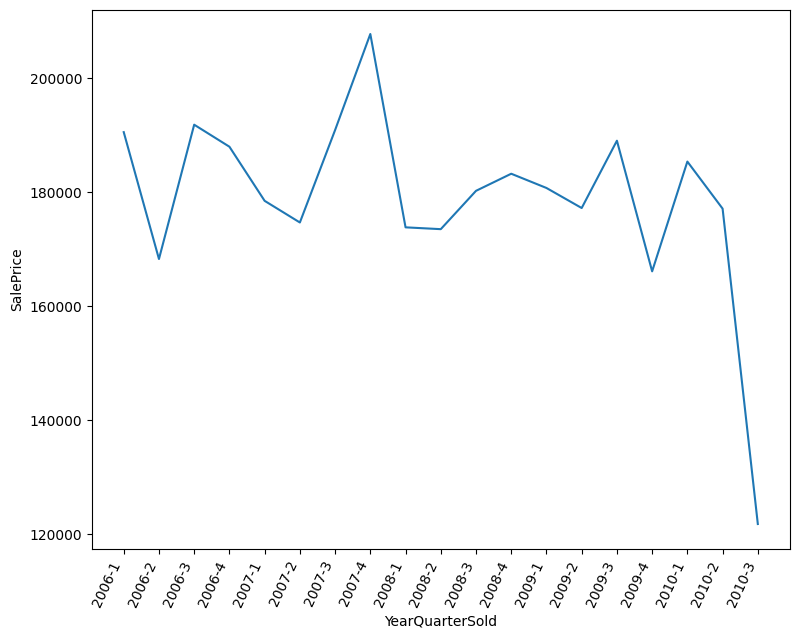

In [ ]:
fig = plt.figure(figsize=(9,7))
sns.lineplot(data=df_agg, x='YearQuarterSold', y='SalePrice')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

### Add the max, min and median to the plot
- Use *describe* and the [Pandas Melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) function
    - use YearQuarterSold as an *id_vars*
    - use 'min', 'mean', '50%', 'max' as *value_vars*

In [ ]:
df_full.groupby('YearQuarterSold').SalePrice.describe().reset_index()

,YearQuarterSold,count,mean,std,min,25%,50%,75%,max
0,2006-1,44.0,190553.522727,71075.435079,52500.0,142875.0,172700.0,228250.0,423000.0
1,2006-2,113.0,168277.176991,69911.153137,79000.0,124000.0,151400.0,197000.0,475000.0
2,2006-3,105.0,191858.980952,89590.623994,80500.0,133000.0,173900.0,225000.0,625000.0
3,2006-4,52.0,187993.480769,81497.678182,35311.0,135375.0,161500.0,231375.0,438780.0
4,2007-1,44.0,178489.159091,119137.563987,39300.0,122000.0,145450.0,200125.0,755000.0
5,2007-2,125.0,174689.232000,67540.070823,79000.0,129000.0,155000.0,195000.0,430000.0
6,2007-3,102.0,190919.156863,91880.502412,64500.0,134250.0,169750.0,217250.0,745000.0
7,2007-4,58.0,207781.827586,76748.133942,67000.0,144000.0,197450.0,264175.0,392000.0
8,2008-1,41.0,173837.951220,73278.323817,55000.0,127000.0,159895.0,192000.0,412500.0
9,2008-2,115.0,173518.391304,64384.079684,68500.0,132750.0,161000.0,200000.0,385000.0


![meme01](https://github.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/blob/master/images/fml_02_meme_01.png?raw=true)

In [ ]:
df_agg = df_full.groupby('YearQuarterSold').SalePrice.describe().reset_index()
df_melt = pd.melt(df_agg, id_vars=['YearQuarterSold'], value_vars=['min', 'mean', '50%', 'max'])
df_melt

,YearQuarterSold,variable,value
0,2006-1,min,52500.0
1,2006-2,min,79000.0
2,2006-3,min,80500.0
3,2006-4,min,35311.0
4,2007-1,min,39300.0
...,...,...,...
71,2009-3,max,501837.0
72,2009-4,max,377500.0
73,2010-1,max,611657.0
74,2010-2,max,538000.0


## What can we say about the minimum and maximum values?
- 💡Take a look at std. deviation

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

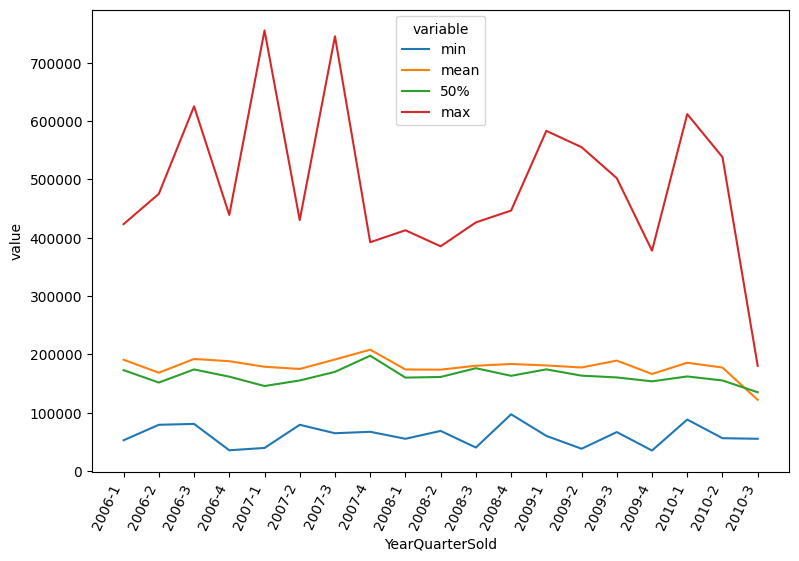

In [ ]:
fig = plt.figure(figsize=(9,6))
sns.lineplot(data=df_melt, x='YearQuarterSold', y='value', hue='variable')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# We can take a look at number of sold houses for the defined time periods as well
## 📊 We will use standard bar plot
- 🔎 In which quarter were the most houses sold?
- 💡 Fun facts: [https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home](https://themortgagereports.com/44135/whats-the-best-time-of-year-to-sell-a-home)

In [ ]:
df_cnt = df_full.groupby('YearQuarterSold').SalePrice.count().reset_index(name='Count')
df_cnt.head(3)

,YearQuarterSold,Count
0,2006-1,44
1,2006-2,113
2,2006-3,105


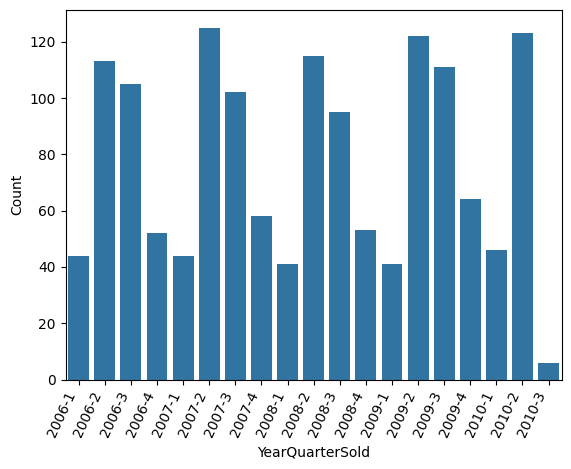

In [ ]:
sns.barplot(data=df_cnt, x='YearQuarterSold', y='Count')
plt.xticks(rotation=65, horizontalalignment='right')
plt.show()

# Tasks (2p)
## ✅ Task 1 - Outlier detection (1p)
- We need to somehow mark the outliers in the data according to the *SalePrice* and *GrLivArea*
    - One possibility is to compute [IQR](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/) for both columns and mark outliers using lower and upper bounds
    - Lower bound: Q1 - 1.5*IQR
    - Upper bound: Q3 + 1.5*IQR
- 💡 If the house has *SalePrice* **OR** *GrLivArea* value outside of the bounds - it is an outlier
- Vizualize the data using scatter plot and distinguish the outlier and non-outlier data using different colors (*hue*) 💡

## ✅ Task 2 - Describe what you see in the data (1p)
- Try to vizualize the relationship between *SalePrice* and *OverallQual*
    - 💡You can use BoxPlots, Scatter plots, etc., the choice of a right plot type is up to you 🙂
- Do the same for *SalePrice* and *OverallCond*; i.e. vizualize and describe insight-
- **Describe the insight you got from the plots with a few sentences in a Markdown cell below the plot**
    - ❌ Plot interpretation figured in real-time during task check is not allowed! ❌

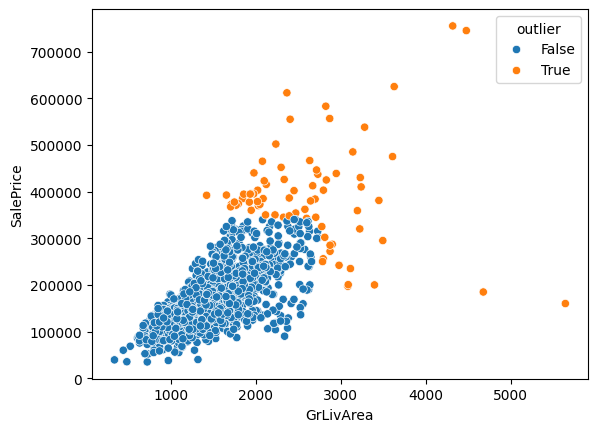

In [ ]:
def is_outlier(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return (df[column] < lower_bound) | (df[column] > upper_bound)

df_full['outlier'] = is_outlier(df_full, 'SalePrice')| is_outlier(df_full, 'GrLivArea')

sns.scatterplot(data=df_full, x='GrLivArea', y='SalePrice', hue='outlier')
plt.show()

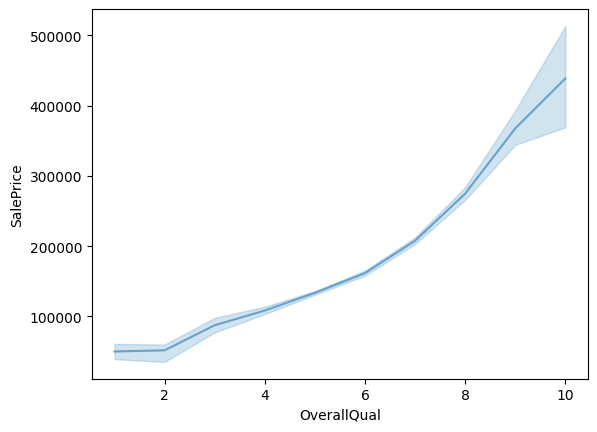

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


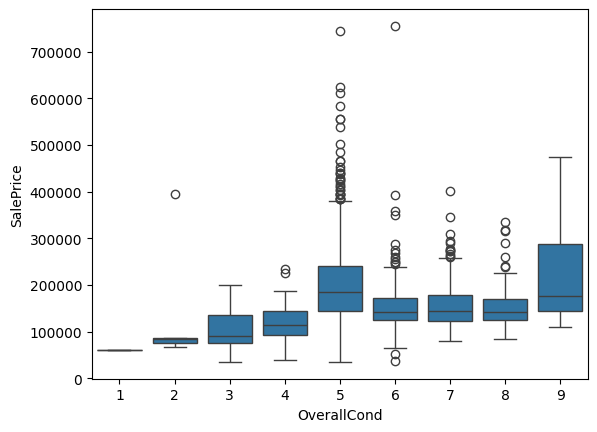

In [ ]:
# sns.lineplot(data=df_full, x='OverallQual', y='SalePrice', alpha=0.6)
sns.lineplot(data=df_full, x='OverallQual', y='SalePrice', alpha=0.6)
plt.show()
# df_sp = df_full.loc[(df_full['OverallQual'] == 10), :].groupby('SalePrice').SalePrice.count().reset_index(name='Count')
# df_sp

sns.boxplot(data=df_full, y='SalePrice', x='OverallCond')
plt.show()



Podle očekávání existuje přímá závislost mezi kvalitou domu a jeho cenou. U vysoce kvalitních domů se ceny pohybují v širokém rozmezí, u nekvalitních domů je také určitá flexibilita, zatímco u středně kvalitních domů jsou ceny téměř stejné.

Životní podmínky také vykazují závislost na ceně, ale tato závislost není tak jednoznačná. Zatímco domy s velmi špatnými resp. velmi dobrými životními podmínkami mají víceméně homogenní ceny, existuje mnoho odlehlých hodnot u domů uprostřed rozpětí.